<script>
  (function(i,s,o,g,r,a,m){i['GoogleAnalyticsObject']=r;i[r]=i[r]||function(){
  (i[r].q=i[r].q||[]).push(arguments)},i[r].l=1*new Date();a=s.createElement(o),
  m=s.getElementsByTagName(o)[0];a.async=1;a.src=g;m.parentNode.insertBefore(a,m)
  })(window,document,'script','https://www.google-analytics.com/analytics.js','ga');

  ga('create', 'UA-50838873-3', 'auto');
  ga('send', 'pageview');

</script>

# Supply and Demand: Consumer Surplus

---

**GOALS:** 

- Understand concepts of consumer and producer surplus

- Use definite integrals to solve problems involving consumer and producer surplus

---



Economists will often refer to **supply** and **demand** curves.  

A **supply curve** is a cost of production function that relates some quantity of goods to a price that attracts this amount at market.  

A **demand curve** is a function that relates a quantity of goods to a price that the market would be cleared of that quantity.

For example, suppose we have a supply curve $S$ as:

$$S(q) = q^2$$

and a demand curve $D$ of:

$$D(q) = (q - 20)^2$$

We can plot these as follows.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy

In [2]:
def S(q):
    return (q**2)

def D(q):
    return (q - 20)**2

q = np.linspace(0, 16, 1000)

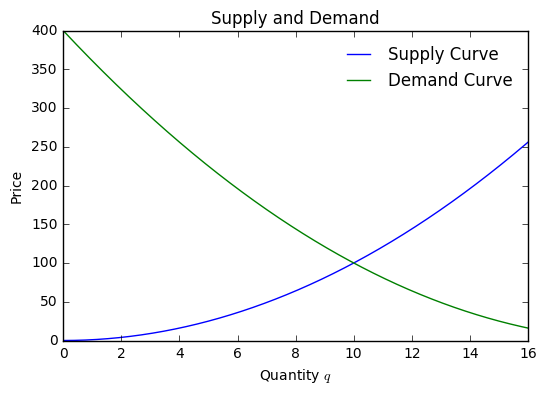

In [3]:
plt.plot(q, S(q), label = "Supply Curve")
plt.plot(q, D(q), label = "Demand Curve")
plt.title("Supply and Demand")
plt.legend(frameon = False)
plt.xlabel("Quantity $q$")
plt.ylabel("Price")

### Equilibrium Price

Where the Supply and Demand curves intersect, we have the **equilibrium price** for the good under consideration.  In order to find this value, we need to solve the equation:

$$S(q) = D(q)$$

We can use Sympy to accomplish this with the `Eq` and `Solve` commands.  

In [4]:
q = sy.Symbol('q')
eq = sy.Eq(S(q), D(q))
sy.solve(eq)

[10]

In [5]:
S(10)

100

Now, we can update our plot to include this point and add some text and an arrow pointing to the equilibrium point using the matplotlib's `annotate` function.  The draws an arrow with some text to a point on the graph.

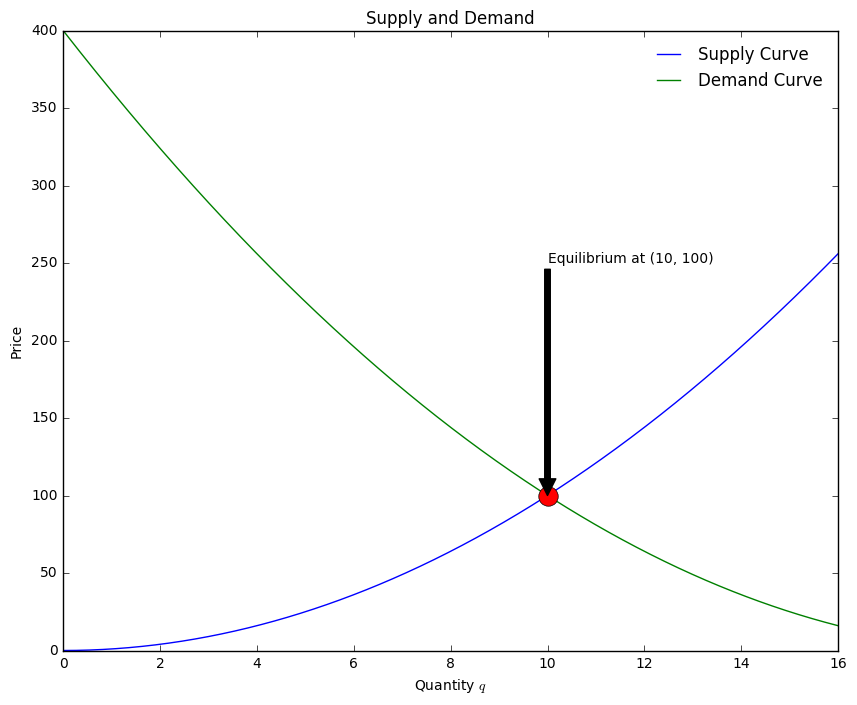

In [6]:
plt.figure(figsize= (10, 8))#create figure and reset q to be numbers
q = np.linspace(0, 16, 1000)


plt.plot(q, S(q), label = "Supply Curve")#plot supply, demand, and equilibrium points
plt.plot(q, D(q), label = "Demand Curve")
plt.plot(10, 100, 'o', markersize = 14)


plt.title("Supply and Demand")#add titles and legend
plt.legend(frameon = False)
plt.xlabel("Quantity $q$")
plt.ylabel("Price")


ax = plt.axes()#add arrow with annotation
ax.annotate('Equilibrium at (10, 100)', xy=(10,100), xytext=(10, 250), arrowprops=dict(facecolor='black'))

### Price Discrimination

Price discrimination refers to the different prices that different consumers are willing to pay for the same product.  For example, some people may be willing to pay \$16 for a six pack of beer while others would refuse.  In order to address different consumers, a corporation might do something like market the same beer under a different logo and name in different kinds of stores.

If the goods producer is able to determine this perfectly, they will have achieved perfect **price discrimination**.  The beer example demonstrates only a partial price discrimination.  An example of perfect price discrimination might be a pay what you want approach where each consumer determine their own price for a good.

In a partial price discrimination scenario, we would have a picture like our step functions, where the width of each rectangle represents a quantity of a good and the height represents the price that this amount of goods sells for.  

Let's visualize the Partial and Perfect Price discrimination situation where we have $\Delta q = 1$.

In [7]:
q = np.arange(0, 16, 1)

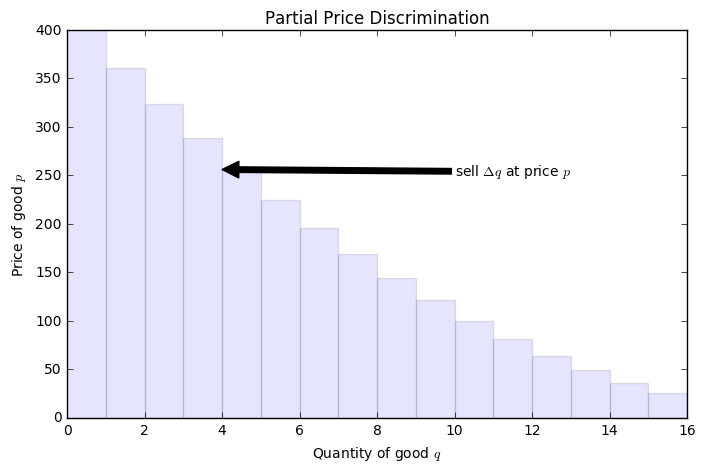

In [8]:
plt.figure(figsize = (8, 5))
plt.bar(q, D(q), alpha = 0.1, width = 1)
plt.title("Partial Price Discrimination")

plt.xlabel("Quantity of good $q$")
plt.ylabel("Price of good $p$")
ax = plt.axes()
ax.annotate('sell $\Delta q$ at price $p$', xy=(4, D(4)), xytext=(10, 250), arrowprops=dict(facecolor='black'))

The area of one of the rectangles then represents the **revenue** to the producer.  Consider the first rectangle.  Here, we have 1 unit of a good and sell this at \$400.  Similarly, we sell a second unit of this good for \$300.  From these sales we would have mad \$700 in total.  

$$ \text{Revenue} = \sum_{i = 1}^n \Delta q D(i\Delta q)$$

Perfect Price Discrimination would be modeled by the continuous case and the Revenue by the Definite Integral.  

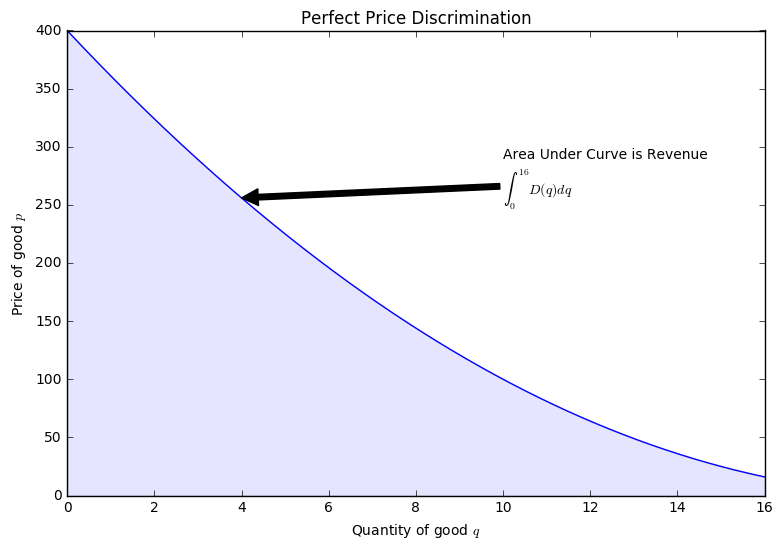

In [9]:
q = np.linspace(0, 16, 1000)
plt.figure(figsize = (9, 6))
plt.plot(q, D(q))
plt.fill_between(q, D(q), alpha = 0.1)
plt.title("Perfect Price Discrimination")

plt.xlabel("Quantity of good $q$")
plt.ylabel("Price of good $p$")
ax = plt.axes()
ax.annotate('Area Under Curve is Revenue \n$\int_0^{16}D(q) dq$', xy=(4, D(4)), xytext=(10, 250), arrowprops=dict(facecolor='black'))

### The Consumer Surplus

When a marketplace finds consumers paying the same price for a good, we are at the **equilibrium price**.  Here, if you think about moving backwards from equilibrium, the price of the good rises, its suppy falls, and there are fewer transactions.  Another way to interpret the area under the Demand curve, is as the value to consumers.  

If there is a difference between this value and what the consumers end up paying, we have a consumer surplus.  This is represented graphically as the area determined by the rectangle formed by the equilibrium price.  The difference between the area under the Demand curve and this rectangle is the **consumer surplus**.

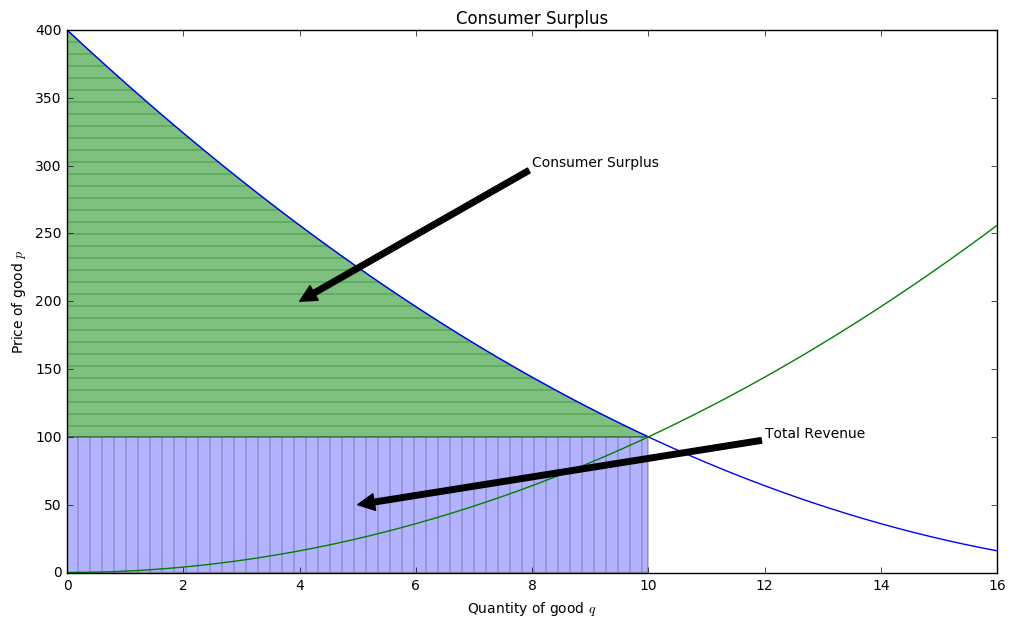

In [10]:
plt.figure(figsize = (12,7))
plt.plot(q, D(q))
plt.plot(q, S(q))
plt.fill_between(q, D(q), 100, where = (D(q) > 100), color = 'green', alpha = 0.5, hatch = '-')
plt.fill_between(q, 100, where = (q<10), alpha = 0.3, hatch = '|')

plt.title("Consumer Surplus")
plt.xlabel("Quantity of good $q$")
plt.ylabel("Price of good $p$")
ax = plt.axes()
ax.annotate('Consumer Surplus', xy=(4, 200), xytext=(8, 300), arrowprops=dict(facecolor='black'))
ax.annotate('Total Revenue', xy = (5, 50), xytext = (12,100), arrowprops=dict(facecolor='black'))

This would be determined by the area under the Demand Curve, but above the horizontal line formed by the equlibrium price($p^\star$).  Thus, we can represent this with the definite integral:

$$\int_0^{10} D(q) - p^\star dq$$

#### Example 

Suppose the supply curve is approximated by the function 

$$p = S(q) = \frac{q^2}{500,000}$$

and the demand curve by the function 

$$p = D(q) = 144 - \frac{q}{500}$$

for $0 \leq q \leq 65,000$.  Determine the equilibrium price and Consumer Surplus.